<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/k2_pix_small.png">
*This notebook contains an excerpt instructional material from [gully](https://twitter.com/gully_) and the [K2 Guest Observer Office](https://keplerscience.arc.nasa.gov/); the content is available [on GitHub](https://github.com/gully/goldenrod).*


<!--NAVIGATION-->
< [Plot the data](02.04-KSN2011b_celerite.ipynb) | [Contents](Index.ipynb) | [! wget -r https://archive.stsci.edu/pub/kepler/target_pixel_files/0031/003111451/](02.06-TPFs_of_supernovas_2011c.ipynb) >

In this notebook we look at the TPF's of supernovas

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import sncosmo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Get the TPF's.  Search here:  
https://archive.stsci.edu/kepler/data_search/search.php

|Event|KIC ID|Link|
|--|--|--|
|KSN2012a|8957091|https://archive.stsci.edu/pub/kepler/target_pixel_files/0089/008957091/ |
|KSN2011b|3111451|https://archive.stsci.edu/pub/kepler/target_pixel_files/0031/003111451/ |  
|KSN2011c|7889229|https://archive.stsci.edu/pub/kepler/target_pixel_files/0078/007889229/|

In [3]:
#! wget -r https://archive.stsci.edu/pub/kepler/target_pixel_files/0031/003111451/

In [4]:
ls -d ../data/KSN20*

../data/KSN2011b/ ../data/KSN2011c/ ../data/KSN2012a/


In [5]:
from astropy.io import fits

In [6]:
hdu_all = fits.open('../data/KSN2011b/kplr003111451-2012004120508_lpd-targ.fits.gz')

In [7]:
hdu_all.info()

Filename: ../data/KSN2011b/kplr003111451-2012004120508_lpd-targ.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  TARGETTABLES    1 BinTableHDU    287   4754R x 13C   [D, E, J, 72J, 72E, 72E, 72E, 72E, 72E, J, E, E, 40E]   
  2  APERTURE      1 ImageHDU        48   (9, 8)   int32   


In [8]:
dat = hdu_all[1].data

In [9]:
JD_like = dat['TIME'] + 2454833.0
MJD = JD_like - 2400000.5
MJD

array([ 55833.70865658,  55833.72908933,  55833.74952227, ...,
        55930.78426953,  55930.8047026 ,  55930.82513546])

In [11]:
dat.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '72J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(9,8)'
    name = 'FLUX'; format = '72E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(9,8)'
    name = 'FLUX_ERR'; format = '72E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(9,8)'
    name = 'FLUX_BKG'; format = '72E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(9,8)'
    name = 'FLUX_BKG_ERR'; format = '72E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(9,8)'
    name = 'COSMIC_RAYS'; format = '72E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(9,8)'
    name = 'QUALITY'; format = 'J'; disp = 'B24.24'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'RB_LEVEL'; format = '40E'; unit = 'sigma'; disp = 'E14.7'; dim = '(5,8)'
)

In [12]:
dat['FLUX'].shape

(4754, 8, 9)

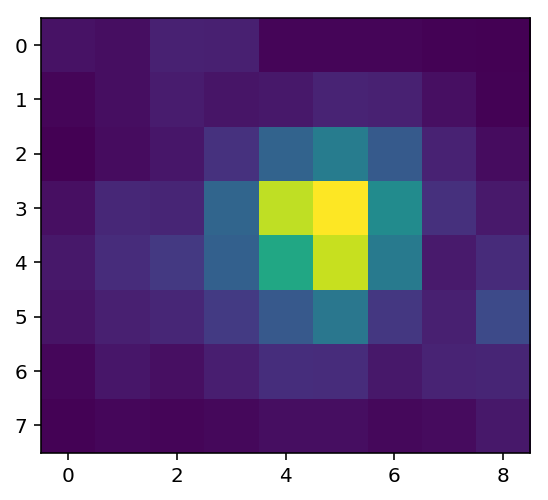

In [92]:
plt.imshow(dat['FLUX'][100, :,:])

In [13]:
dat['TIME']

array([ 1001.20865658,  1001.22908933,  1001.24952227, ...,  1098.28426954,
        1098.3047026 ,  1098.32513546])

In [15]:
KEGS_header = pd.read_csv('../data/KSN-2011b_raw_data.dat', skiprows=11, sep=r'\s{2,}', nrows=0, engine='python')
names = KEGS_header.columns.str.strip('#').str.replace(' ', '').str.replace('-', '_')
ksn2011b = pd.read_csv('../data/KSN-2011b_raw_data.dat', comment='#', names=names, delim_whitespace=True)
ksn2011b.head()

,KJD,KJD_T_EXP,KJD_T_MAX,LC_val_BCK,LC_err
0,964.77569,-29.98871,-49.04431,0.01157,0.01011
1,964.79613,-29.96827,-49.02387,0.00186,0.01027
2,964.81656,-29.94784,-49.00344,-0.00355,0.01065
3,964.83699,-29.92741,-48.98301,-0.00459,0.00976
4,964.85743,-29.90697,-48.96257,0.00710,0.01097


In [16]:
x = ksn2011b.KJD.values
yerr = x*0.0+0.01
y = ksn2011b.LC_val_BCK.values

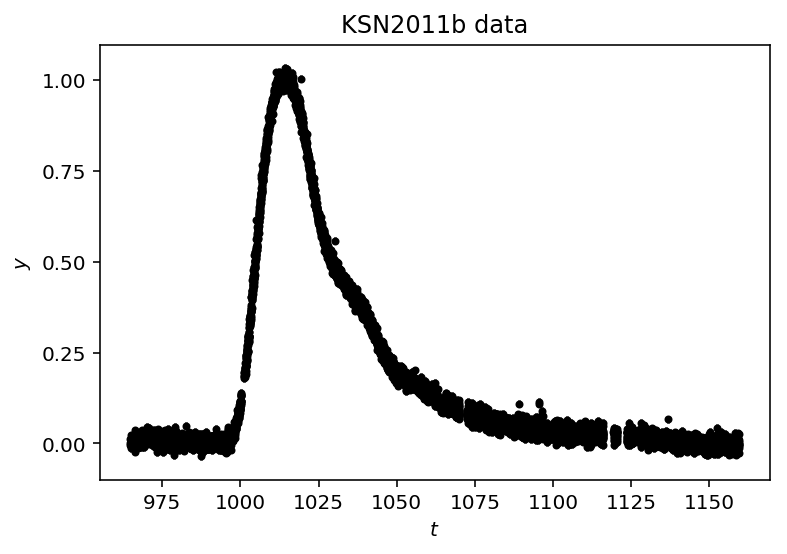

In [17]:
# Plot the data
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.ylabel(r"$y$")
plt.xlabel(r"$t$")
#plt.xlim(-5, 5)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(5))
plt.title("KSN2011b data");

Read in the Kepler lightcurve.

In [20]:
import os

In [82]:
fn_Series = pd.Series(data=os.listdir('../data/KSN2011b/'))

In [83]:
fns = fn_Series[fn_Series.str.contains('_llc.')].values
fns_tpfs = fn_Series[fn_Series.str.contains('lpd-targ.fits')].values

In [80]:
fn =fns_tpfs[0]

In [68]:
hdu = fits.open('../data/KSN2011b/'+fn)

In [69]:
hdu.info()

Filename: ../data/KSN2011b/kplr003111451-2009131105131_lpd-targ.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  TARGETTABLES    1 BinTableHDU    282   476R x 13C   [D, E, J, 100J, 100E, 100E, 100E, 100E, 100E, J, E, E, 0E]   
  2  APERTURE      1 ImageHDU        48   (10, 10)   int32   


In [70]:
hdu[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '100J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(10,10)'
    name = 'FLUX'; format = '100E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(10,10)'
    name = 'FLUX_ERR'; format = '100E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(10,10)'
    name = 'FLUX_BKG'; format = '100E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(10,10)'
    name = 'FLUX_BKG_ERR'; format = '100E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(10,10)'
    name = 'COSMIC_RAYS'; format = '100E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(10,10)'
    name = 'QUALITY'; format = 'J'; disp = 'B24.24'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'RB_LEVEL'; format = '0E'; unit = 'sigma'; disp = 'E14.7'; dim = '(0,

In [47]:
hdu.close()

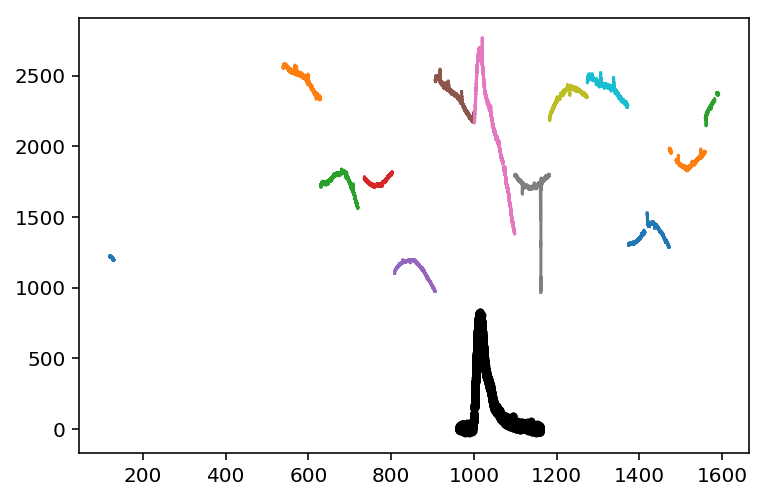

In [57]:
for i, fn in enumerate(fns):
    hdu = fits.open('../data/KSN2011b/'+fn)
    #plt.plot(hdu[1].data['TIME'], hdu[1].data['PDCSAP_FLUX'])
    plt.plot(hdu[1].data['TIME'], hdu[1].data['SAP_FLUX']-hdu[1].data['SAP_BKG'])
    hdu.close()

plt.plot(x, y*800.0, ".k")

(800, 1200)

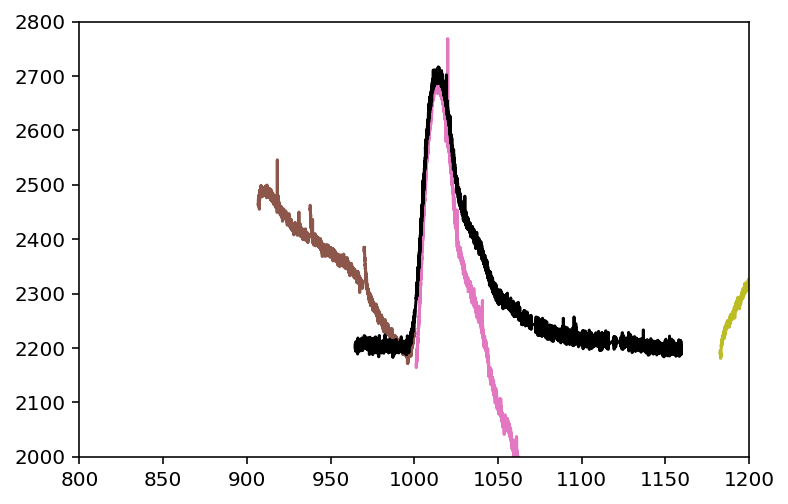

In [63]:
for i, fn in enumerate(fns):
    hdu = fits.open('../data/KSN2011b/'+fn)
    #plt.plot(hdu[1].data['TIME'], hdu[1].data['PDCSAP_FLUX'])
    plt.plot(hdu[1].data['TIME'], hdu[1].data['SAP_FLUX']-hdu[1].data['SAP_BKG'])
    hdu.close()

plt.plot(x, 2200.0+y*500.0, "-k")
plt.ylim(2000, 2800)
plt.xlim(800, 1200)

## Sum all TPFs

In [91]:
import seaborn as sns

In [92]:
sns.set_context('notebook')

(0, 30000)

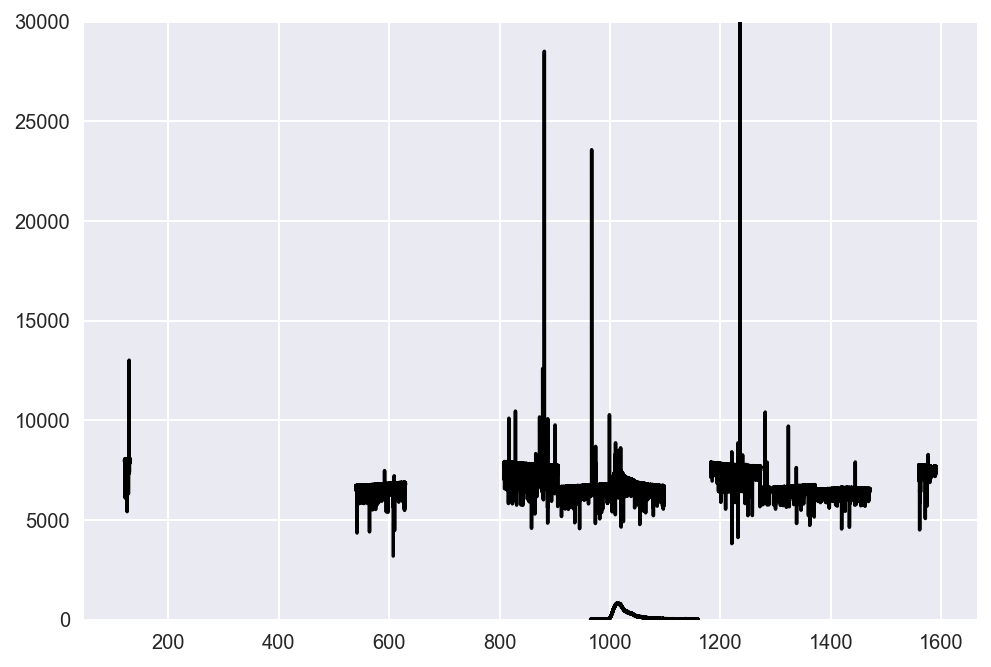

In [132]:
for i, fn in enumerate(fns_tpfs):
    hdu = fits.open('../data/KSN2011b/'+fn)
    #plt.plot(hdu[1].data['TIME'], hdu[1].data['PDCSAP_FLUX'])
    cr = hdu[1].data['COSMIC_RAYS']
    gi = cr != cr
    flux = (hdu[1].data['FLUX']*gi).sum(2).sum(1)
    bkg = (hdu[1].data['FLUX_BKG']*gi).sum(2).sum(1)
    plt.plot(hdu[1].data['TIME'], flux, 'k')
    #plt.plot(hdu[1].data['TIME'], bkg, 'r')
    hdu.close()

plt.plot(x, y*800.0, "-k")
plt.ylim(0, 30000)

In [130]:
np.unique(cr)

array([ 3.9289887 ,  4.04418993,  4.0521121 , ...,         nan,
               nan,         nan], dtype=float32)

In [123]:
hdu[1].data['FLUX'][gi]

array([ -5.49176121,   3.72494698,  70.51255035, ...,  15.68943024,
         0.39581016,   1.20474958], dtype=float32)

<!--NAVIGATION-->
< [Plot the data](02.04-KSN2011b_celerite.ipynb) | [Contents](Index.ipynb) | [! wget -r https://archive.stsci.edu/pub/kepler/target_pixel_files/0031/003111451/](02.06-TPFs_of_supernovas_2011c.ipynb) >